# Text Mining 1

## Part 1

### Import libraries

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# Only do this once.  Details at https://www.nltk.org/data.html
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw')

# Alternative method
# nltk.download()
# Use default Download directory
#    -> select Corpora tab -> scroll to Stopwords Corpus -> click Download
#    -> select Corpora tab -> scroll to WordNet -> click Download
#    -> select Corpora tab -> scroll to OMW -> click Download

[nltk_data] Downloading package wordnet to /Users/vj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/vj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /Users/vj/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

### Try stemming and lemmatization

In [3]:
# Instantiate 3 different Stemmers
pstemmer = PorterStemmer()
sbstemmer = SnowballStemmer('english')
lstemmer = LancasterStemmer()

# Instantiate a lemmaztizer
lemmatizer = WordNetLemmatizer()

In [4]:
# Detailed example
test_words = ['cats', 'oxen', 'amaze', 'amazing', 'amazement', 'amazon', 'nation', 'stabilize',
              'friendship', 'fairly', 'loudly', 'generically', 'generous', 'salty', 'sales',
              'cares', 'caring', 'caress', 'troubles', 'troubling', 'troubled']

p_stemmed_words = [pstemmer.stem(test_word) for test_word in test_words]
sb_stemmed_words = [sbstemmer.stem(test_word) for test_word in test_words]
l_stemmed_words = [lstemmer.stem(test_word) for test_word in test_words]
wn_lemmatized_words = [lemmatizer.lemmatize(test_word) for test_word in test_words]

pd.DataFrame(data = {'test word': test_words,
                     'Porter stemmed': p_stemmed_words,
                     'Snowball stemmed': sb_stemmed_words,
                     'Lancaster stemmed': l_stemmed_words,
                     'WordNet lemmatized': wn_lemmatized_words
                    })

,test word,Porter stemmed,Snowball stemmed,Lancaster stemmed,WordNet lemmatized
0,cats,cat,cat,cat,cat
1,oxen,oxen,oxen,ox,ox
2,amaze,amaz,amaz,amaz,amaze
3,amazing,amaz,amaz,amaz,amazing
4,amazement,amaz,amaz,amaz,amazement
5,amazon,amazon,amazon,amazon,amazon
6,nation,nation,nation,nat,nation
7,stabilize,stabil,stabil,stabl,stabilize
8,friendship,friendship,friendship,friend,friendship
9,fairly,fairli,fair,fair,fairly


#### Note differences between stemming and lemmatization

In [5]:
# Lemmatizer example using part-of-speech tagging
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


### Load data

In [6]:
# Test text
text = 'Rome was founded in 753BC by its first king, Romulus.'
text

'Rome was founded in 753BC by its first king, Romulus.'

#### Prepare the tokenizer

In [7]:
# Instantiate the tokenizer object
# By passing r'\w+' to the RegexpTokenizer, we are selecting groups of single words, discarding the punctuation
tokenizer = RegexpTokenizer(r'\w+')

#### Extract tokens

In [8]:
tokens = tokenizer.tokenize(text)
tokens

['Rome',
 'was',
 'founded',
 'in',
 '753BC',
 'by',
 'its',
 'first',
 'king',
 'Romulus']

#### Remove stop words

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Use english stop-words
sw = stopwords.words('english')

In [11]:
# Create new list named clean_tokens through a list comprehension
clean_tokens = [token for token in tokens if token not in sw]
clean_tokens

['Rome', 'founded', '753BC', 'first', 'king', 'Romulus']

In [12]:
# Stem each word through a list comprehension
[pstemmer.stem(token) for token in clean_tokens]

['rome', 'found', '753bc', 'first', 'king', 'romulu']

In [13]:
# Lemmatize each word through a list comprehension
[lemmatizer.lemmatize(token) for token in clean_tokens]

['Rome', 'founded', '753BC', 'first', 'king', 'Romulus']

## Part 2

### Import libraries

In [14]:
# pip install wikipedia

In [15]:
# pip install wordcloud

In [16]:
import wikipedia
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### Scrape Wikipedia page

In [17]:
# Scrape web page
#  Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')
wiki

<WikipediaPage 'Web scraping'>

In [18]:
# Extract the plain text content of the page
text = wiki.content
text

'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.\nScraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, extraction can take place. The content of a page may be parsed, searched and reformatted, and its data copied into a spreadsheet or loaded into a database. Web scrapers typically take s

In [19]:
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text

'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.Scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, extraction can take place. The content of a page may be parsed, searched and reformatted, and its data copied into a spreadsheet or loaded into a database. Web scrapers typically take som

### Display word cloud

In [20]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

CPU times: user 11.1 s, sys: 2.62 s, total: 13.7 s
Wall time: 13.8 s


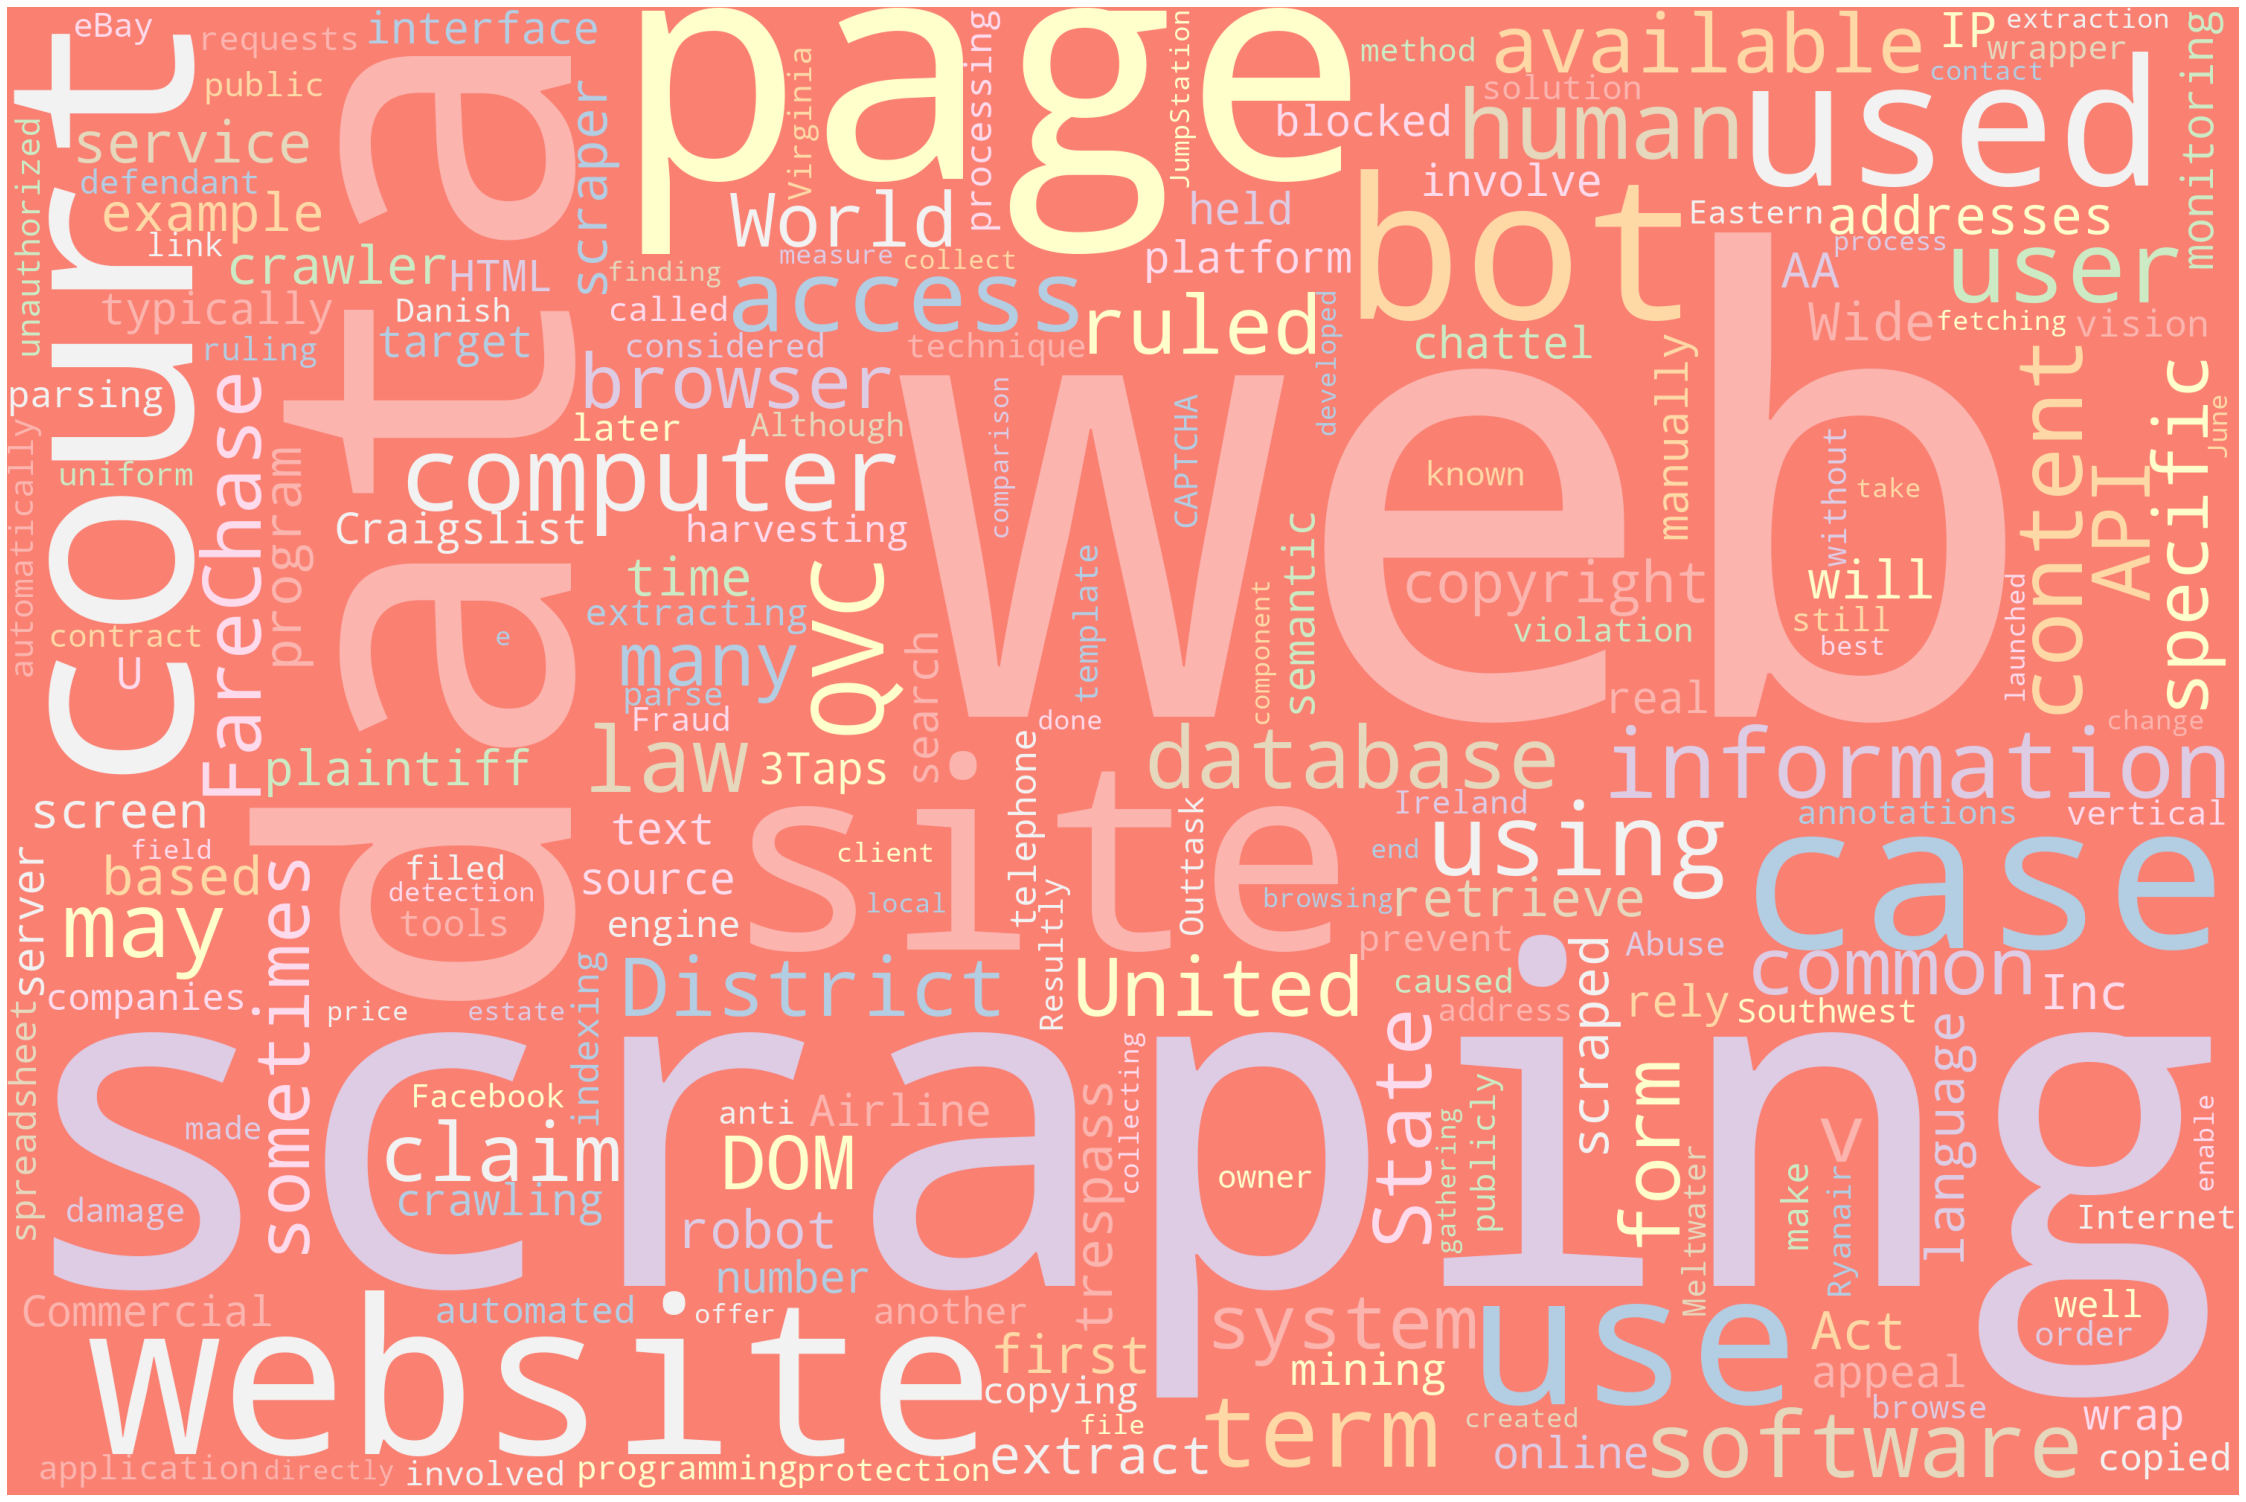

In [21]:
%%time

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1,
                      background_color='salmon', colormap='Pastel1', collocations=False,
                      stopwords = STOPWORDS).generate(text)

# Plot word cloud
plot_cloud(wordcloud)

CPU times: user 11.2 s, sys: 2.67 s, total: 13.8 s
Wall time: 14 s


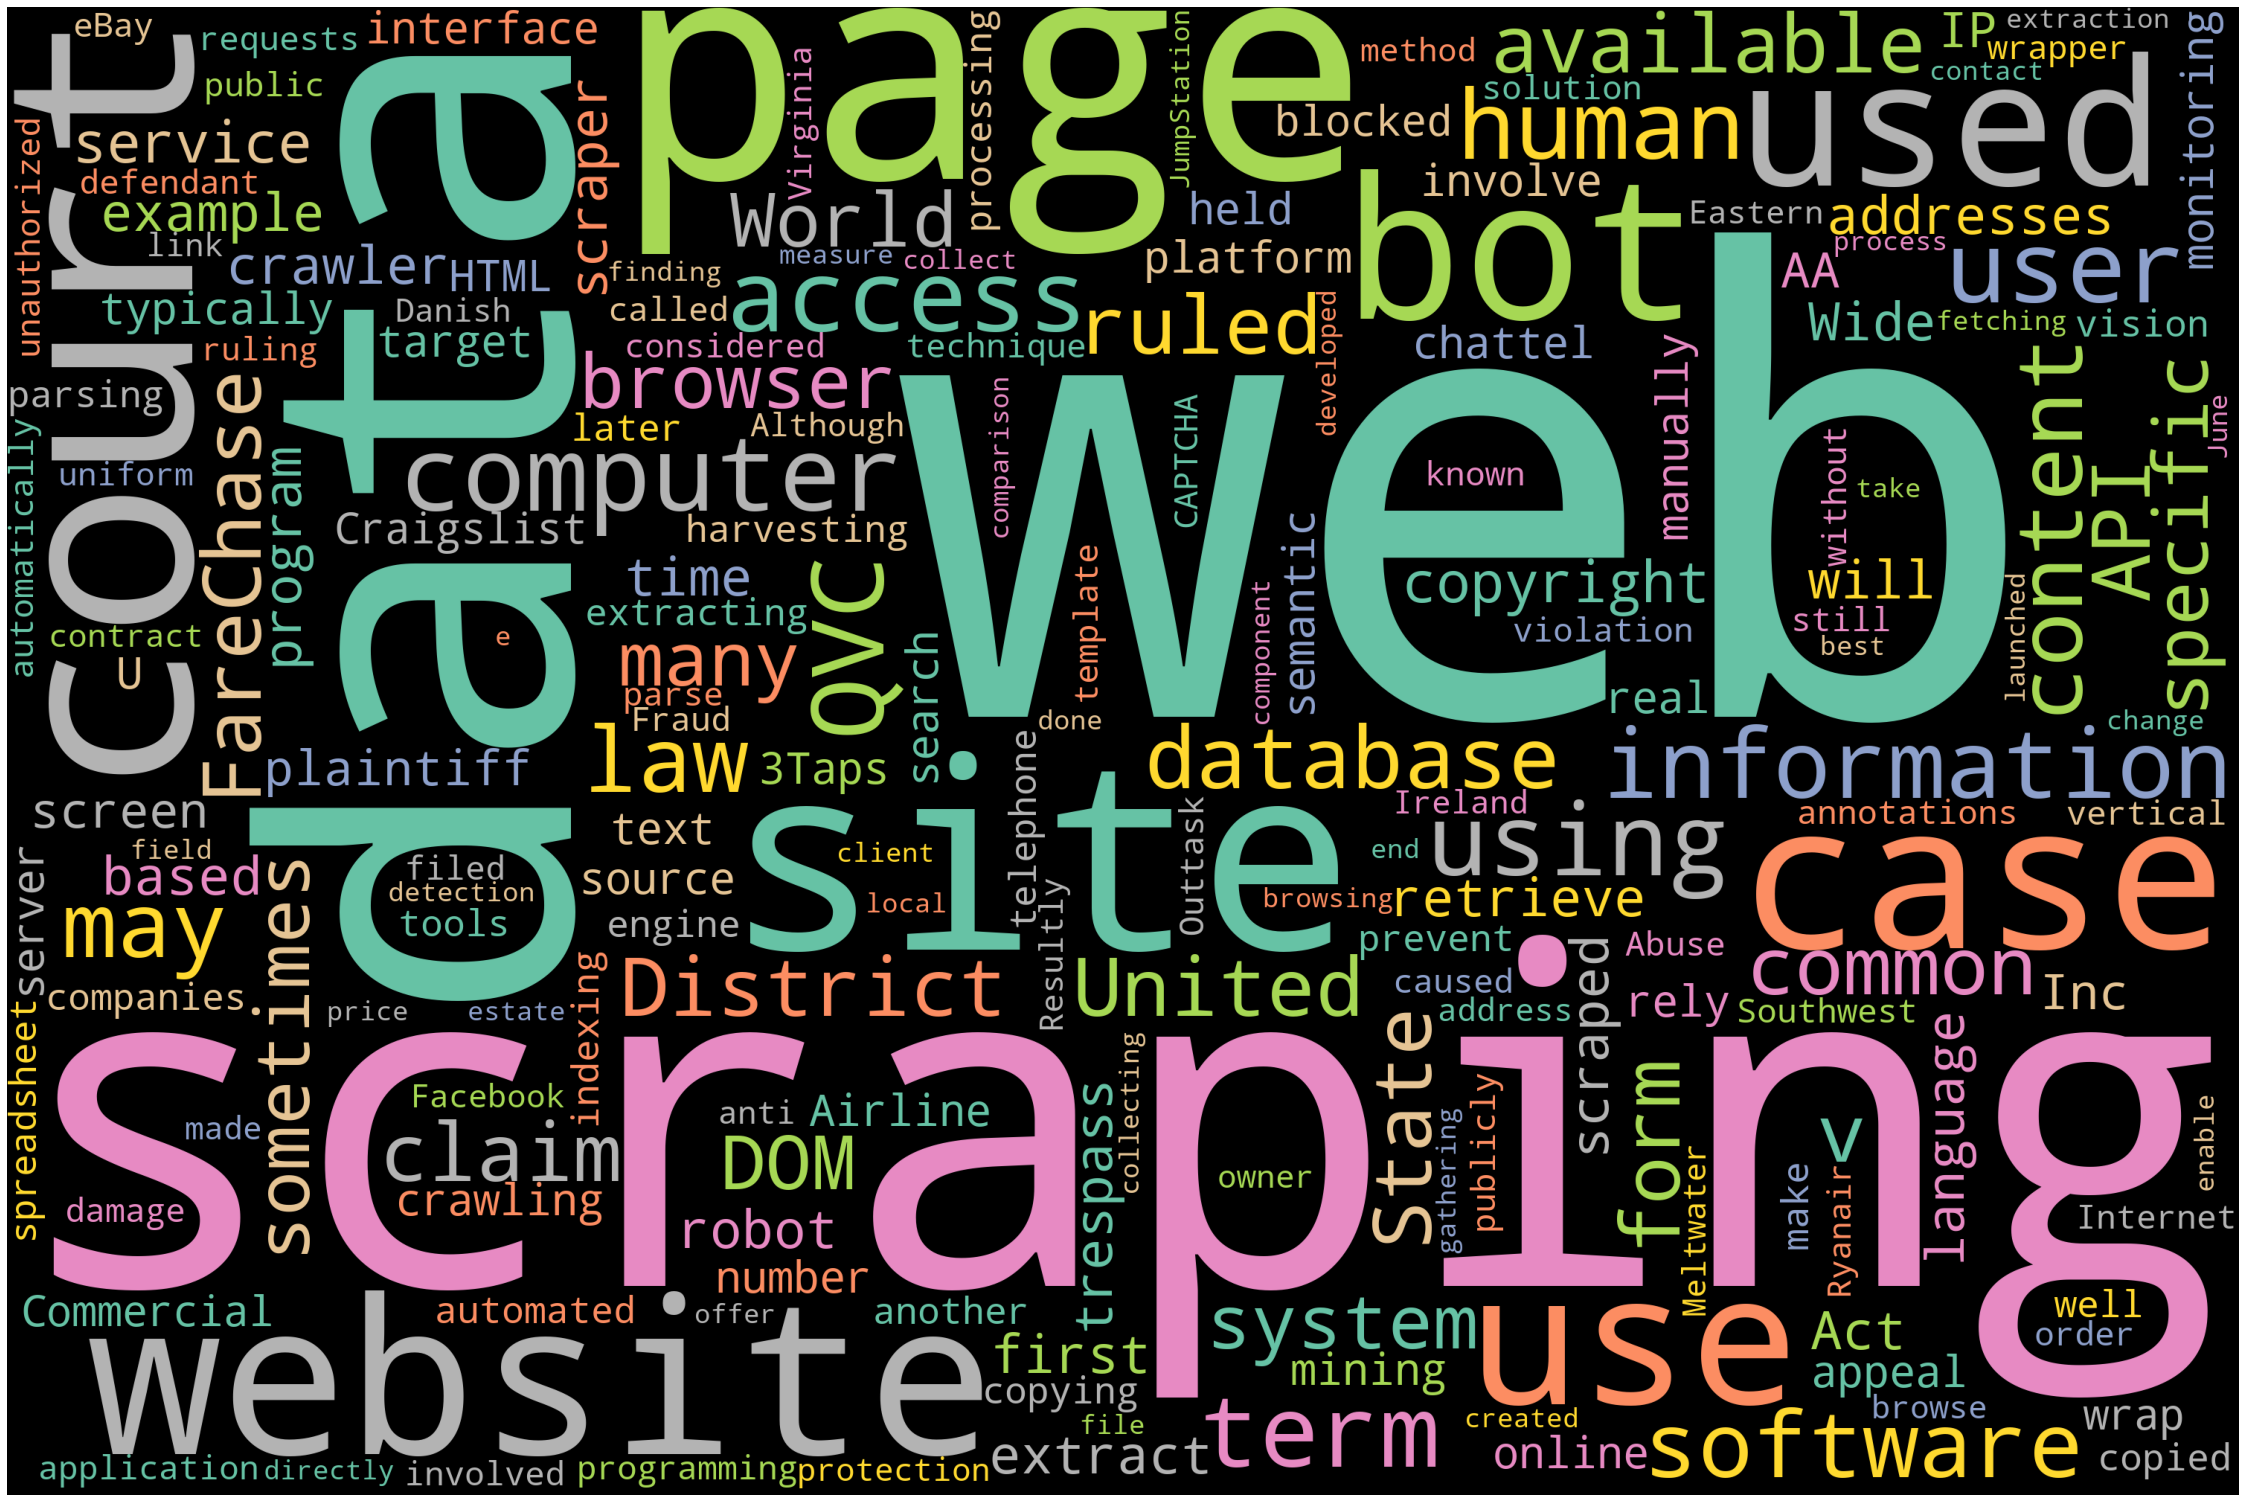

In [22]:
%%time

# Generate word cloud with different background color and colormap
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2', collocations=False,
                      stopwords = STOPWORDS).generate(text)

# Plot word cloud
plot_cloud(wordcloud)